In [1]:
import os
import math

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

## Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_semestr_2.csv'])
matrix_bak = pd.read_csv(path_file, sep=",")

## Info o datasetu

In [3]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   studium_id               2429 non-null   int64  
 1   dokoncil_semestr         2429 non-null   float64
 2   BI-PA1_znamka            2429 non-null   float64
 3   BI-PA1_poradi_zapisu     2429 non-null   float64
 4   BI-PAI_znamka            2429 non-null   float64
 5   BI-PAI_poradi_zapisu     2429 non-null   float64
 6   BI-CAO_znamka            2429 non-null   float64
 7   BI-CAO_poradi_zapisu     2429 non-null   float64
 8   BI-PS1_znamka            2429 non-null   float64
 9   BI-PS1_poradi_zapisu     2429 non-null   float64
 10  BI-MLO_znamka            2429 non-null   float64
 11  BI-MLO_poradi_zapisu     2429 non-null   float64
 12  BI-ZMA_znamka            2429 non-null   float64
 13  BI-ZMA_poradi_zapisu     2429 non-null   float64
 14  pocet_kreditu_semestr_1 

In [4]:
matrix_bak.mean()

studium_id                 1.504802e+07
dokoncil_semestr           8.435570e-01
BI-PA1_znamka              2.468506e+00
BI-PA1_poradi_zapisu       8.929601e-01
BI-PAI_znamka              1.978592e+00
BI-PAI_poradi_zapisu       8.501441e-01
BI-CAO_znamka              1.013998e+00
BI-CAO_poradi_zapisu       7.875669e-01
BI-PS1_znamka              2.322149e+00
BI-PS1_poradi_zapisu       8.995471e-01
BI-MLO_znamka              2.061342e+00
BI-MLO_poradi_zapisu       8.320296e-01
BI-ZMA_znamka              2.438246e+00
BI-ZMA_poradi_zapisu       8.855496e-01
pocet_kreditu_semestr_1    2.466900e+01
dtype: float64

## Příprava datasetu

### Nastavení indexu

In [5]:
matrix_bak = matrix_bak.set_index(['studium_id'])

### Nastavení atributů na kategorické - ordinální

In [6]:
# ordinální
grades_category = pd.api.types.CategoricalDtype(categories=[-1, 1, 1.5, 2, 2.5, 3, 4], ordered=True)
# BI-PA1
matrix_bak['BI-PA1_znamka'] = matrix_bak['BI-PA1_znamka'].astype(grades_category)
# BI-PAI
matrix_bak['BI-PAI_znamka'] = matrix_bak['BI-PAI_znamka'].astype(grades_category)
# BI-CAO
matrix_bak['BI-CAO_znamka'] = matrix_bak['BI-CAO_znamka'].astype(grades_category)
# BI-PS1
matrix_bak['BI-PS1_znamka'] = matrix_bak['BI-PS1_znamka'].astype(grades_category)
# BI-MLO
matrix_bak['BI-MLO_znamka'] = matrix_bak['BI-MLO_znamka'].astype(grades_category)
# BI-ZMA
matrix_bak['BI-ZMA_znamka'] = matrix_bak['BI-ZMA_znamka'].astype(grades_category)

In [7]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2429 entries, 14267106 to 11740806
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   dokoncil_semestr         2429 non-null   float64 
 1   BI-PA1_znamka            2429 non-null   category
 2   BI-PA1_poradi_zapisu     2429 non-null   float64 
 3   BI-PAI_znamka            2429 non-null   category
 4   BI-PAI_poradi_zapisu     2429 non-null   float64 
 5   BI-CAO_znamka            2429 non-null   category
 6   BI-CAO_poradi_zapisu     2429 non-null   float64 
 7   BI-PS1_znamka            2429 non-null   category
 8   BI-PS1_poradi_zapisu     2429 non-null   float64 
 9   BI-MLO_znamka            2429 non-null   category
 10  BI-MLO_poradi_zapisu     2429 non-null   float64 
 11  BI-ZMA_znamka            2429 non-null   category
 12  BI-ZMA_poradi_zapisu     2429 non-null   float64 
 13  pocet_kreditu_semestr_1  2429 non-null   float64 
dt

## Modelování

### Bakalář všechny pp

#### Rozdělení datasetu

In [8]:
Xdata = matrix_bak.drop(columns='dokoncil_semestr')
ydata = matrix_bak.dokoncil_semestr

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(2429, 13)

(2429,)

trénovací data


(1943, 13)

(1943,)

testovací data


(486, 13)

(486,)

#### Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [10]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'f1'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

#### Rozhodovací strom

In [11]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [12]:
dt_f1 = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}

0.921225 (+/-0.019250) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.920989 (+/-0.019022) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.915971 (+/-0.021981) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.916174 (+/-0.020406) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.915228 (+/-0.026610) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.921225 (+/-0.019250) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.921916 (+/-0.018844) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.916673 (+/-0.020735) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.916712 (+/-0.019660) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.915417 (+/-0.018999) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [13]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt_f1.predict(Xtest))))

accuracy score (train): 0.862584
accuracy score (test): 0.874486


In [14]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
12,pocet_kreditu_semestr_1,0.943122
10,BI-ZMA_znamka,0.023272
6,BI-PS1_znamka,0.017497
0,BI-PA1_znamka,0.016109
1,BI-PA1_poradi_zapisu,0.000000
2,BI-PAI_znamka,0.000000
3,BI-PAI_poradi_zapisu,0.000000
4,BI-CAO_znamka,0.000000
5,BI-CAO_poradi_zapisu,0.000000
7,BI-PS1_poradi_zapisu,0.000000


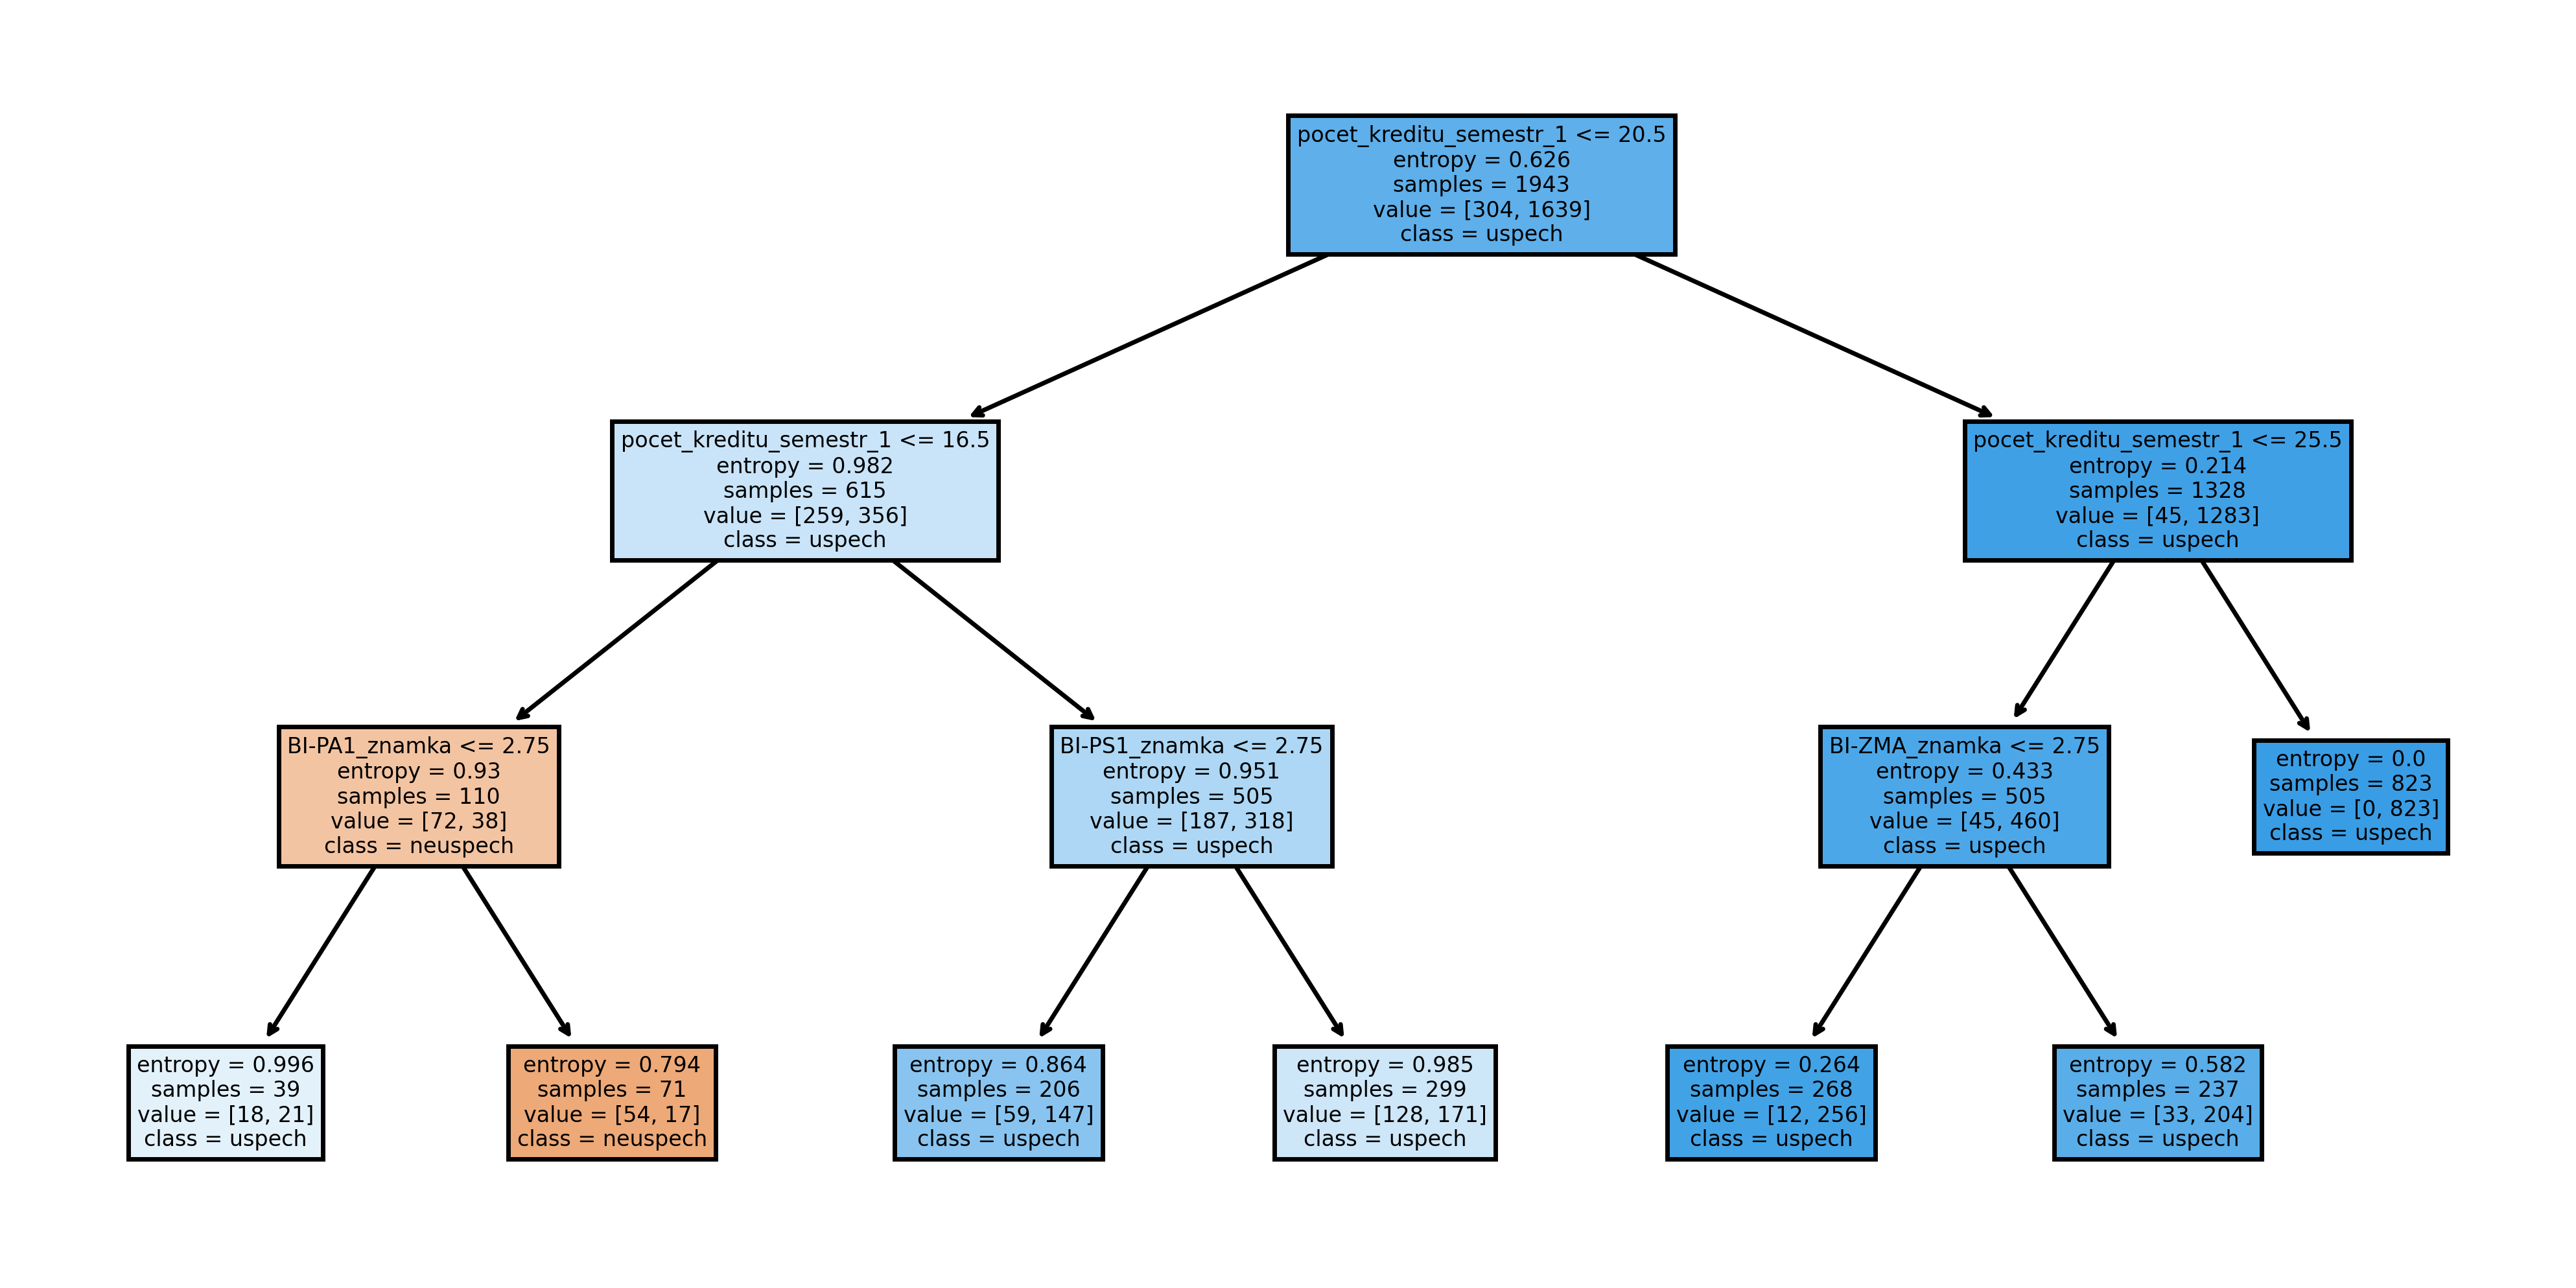

In [15]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt_f1.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);
path_file = os.sep.join(['decision_trees', 'tree_f1_semestr2.png'])
fig.savefig(path_file)

#### Random forest

In [16]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [17]:
rf_f1 = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 10, 'n_estimators': 20}

0.916072 (+/-0.004836) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.916158 (+/-0.004041) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.916017 (+/-0.001905) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.915083 (+/-0.001177) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.915131 (+/-0.001086) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.915131 (+/-0.001086) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.915131 (+/-0.001086) for {'criterion': 'gini', 'max_depth': 2, 'max_

In [18]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf_f1.predict(Xtest))))

accuracy score (train): 0.862584
accuracy score (test): 0.870370


In [19]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
12,pocet_kreditu_semestr_1,0.907520
0,BI-PA1_znamka,0.028795
6,BI-PS1_znamka,0.022135
4,BI-CAO_znamka,0.015129
10,BI-ZMA_znamka,0.008630
2,BI-PAI_znamka,0.008421
8,BI-MLO_znamka,0.007429
1,BI-PA1_poradi_zapisu,0.001284
11,BI-ZMA_poradi_zapisu,0.000658
3,BI-PAI_poradi_zapisu,0.000000


#### Adaboost

In [20]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [21]:
ab_f1 = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.2, 'n_estimators': 25}

0.915131 (+/-0.001086) for {'learning_rate': 0.1, 'n_estimators': 5}
0.913271 (+/-0.007947) for {'learning_rate': 0.1, 'n_estimators': 10}
0.915658 (+/-0.011187) for {'learning_rate': 0.1, 'n_estimators': 15}
0.917589 (+/-0.013210) for {'learning_rate': 0.1, 'n_estimators': 20}
0.919213 (+/-0.010901) for {'learning_rate': 0.1, 'n_estimators': 25}
0.919617 (+/-0.010959) for {'learning_rate': 0.1, 'n_estimators': 30}
0.920401 (+/-0.012533) for {'learning_rate': 0.1, 'n_estimators': 35}
0.921855 (+/-0.017154) for {'learning_rate': 0.1, 'n_estimators': 40}
0.921779 (+/-0.018733) for {'learning_rate': 0.1, 'n_estimators': 45}
0.915131 (+/-0.001086) for {'learning_rate': 0.2, 'n_estimators': 5}
0.917556 (+/-0.013820) for {'learning_rate': 0.2, 'n_estimators': 10}
0.919617 (+/-0.010959) for {'learning_rate': 0.2, 'n_estimators': 15}
0.921953 (+/-0.016977) for {'learning_rate': 0.2, 'n_estimators': 20}
0.922801 (+/-0.01697

In [22]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab_f1.predict(Xtest))))

accuracy score (train): 0.861554
accuracy score (test): 0.874486


In [23]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
12,pocet_kreditu_semestr_1,0.60
0,BI-PA1_znamka,0.16
4,BI-CAO_znamka,0.12
10,BI-ZMA_znamka,0.08
6,BI-PS1_znamka,0.04
1,BI-PA1_poradi_zapisu,0.00
2,BI-PAI_znamka,0.00
3,BI-PAI_poradi_zapisu,0.00
5,BI-CAO_poradi_zapisu,0.00
7,BI-PS1_poradi_zapisu,0.00


#### Xgboost

In [24]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [25]:
xgb_f1 = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.2, 'max_depth': 3}

0.918036 (+/-0.016969) for {'eta': 0.1, 'max_depth': 3}
0.915109 (+/-0.019158) for {'eta': 0.1, 'max_depth': 4}
0.915714 (+/-0.018239) for {'eta': 0.1, 'max_depth': 5}
0.913679 (+/-0.021755) for {'eta': 0.1, 'max_depth': 6}
0.913095 (+/-0.017648) for {'eta': 0.1, 'max_depth': 7}
0.918202 (+/-0.019333) for {'eta': 0.2, 'max_depth': 3}
0.911713 (+/-0.014148) for {'eta': 0.2, 'max_depth': 4}
0.911135 (+/-0.020352) for {'eta': 0.2, 'max_depth': 5}
0.908196 (+/-0.020112) for {'eta': 0.2, 'max_depth': 6}
0.909146 (+/-0.017291) for {'eta': 0.2, 'max_depth': 7}
0.915547 (+/-0.017164) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.909961 (+/-0.016829) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.908476 (+/-0.016906) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.908079 (+/-0.015591) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.907483 (+/-0.016276) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.913291 (+/-0.016046)

In [26]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb_f1.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest))))

accuracy score XGBoost (train): 0.890890
accuracy score XGBoost (val): 0.860082


In [27]:
feat_imp = pd.Series(xgb_f1.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [28]:
feat_imp

pocet_kreditu_semestr_1    90.0
BI-PS1_znamka              85.0
BI-PAI_znamka              81.0
BI-PA1_znamka              69.0
BI-ZMA_znamka              64.0
BI-MLO_znamka              61.0
BI-CAO_znamka              56.0
BI-ZMA_poradi_zapisu        2.0
BI-PAI_poradi_zapisu        2.0
BI-PA1_poradi_zapisu        1.0
dtype: float64

#### MLP

In [29]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [30]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.870818
accuracy score mlp (val): 0.868313


#### Lineární regrese

In [31]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [32]:
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtrain), np.array(ytrain))))
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtest), np.array(ytest))))

RMSE reg (test): 0.3129843273269107
RMSE reg (test): 0.31044836333034037


#### kNN

In [33]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [34]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

0.890825 (+/-0.015719) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.890825 (+/-0.015719) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.891297 (+/-0.016525) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.891297 (+/-0.016525) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.870987 (+/-0.016686) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.876404 (+/-0.015840) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.876102 (+/-0.015949) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.879824 (+/-0.013770) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.906332 (+/-0.012802) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.895111 (+/-0.014854) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.903499 (+/-0.011239) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.896110 (+/-0.013911) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.89

In [35]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (val): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 0.880597
accuracy score knn (val): 0.860082


## Výsledky

In [36]:
results = pd.DataFrame(columns=['vysledky'], index=['dt', 'rf', 'ab', 'xgb', 'mlp', 'knn'])

### Měřeno accuracy_score

In [37]:
results.loc['dt', 'vysledky'] = round(metrics.accuracy_score(ytest, dt_f1.predict(Xtest)), 3)
results.loc['rf', 'vysledky'] = round(metrics.accuracy_score(ytest, rf_f1.predict(Xtest)), 3)
results.loc['ab', 'vysledky'] = round(metrics.accuracy_score(ytest, ab_f1.predict(Xtest)), 3)
results.loc['xgb', 'vysledky'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest)), 3)
results.loc['mlp', 'vysledky'] = round(metrics.accuracy_score(ytest, mlp.predict(Xtest)), 3)
results.loc['knn', 'vysledky'] = round(metrics.accuracy_score(ytest, knn.predict(Xtest)), 3)

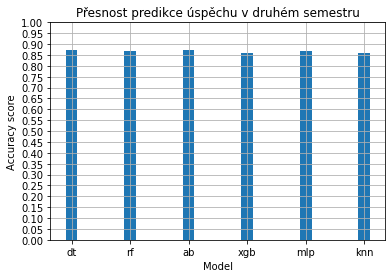

In [38]:
fig, ax = plt.subplots()
width = 0.2
ax.bar(results.index, results['vysledky'].values, width)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Model')
ax.set_title('Přesnost predikce úspěchu v druhém semestru')

ax.grid(True)
y_values = np.arange(0.0, 1.05, 0.05)
plt.ylim(ymin=0)
plt.ylim(ymax=1)
plt.yticks(y_values)
plt.show()

In [39]:
results

,vysledky
dt,0.874
rf,0.87
ab,0.874
xgb,0.86
mlp,0.868
knn,0.86
